In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
  

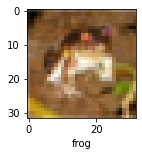

In [9]:
plot_sample(X_train, y_train, 0)

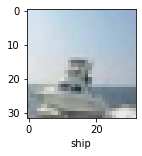

In [10]:
plot_sample(X_train, y_train, 100)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
    
])


ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.8135 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6257 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5422 - accuracy: 0.4552
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4823 - accuracy: 0.4756
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4322 - accuracy: 0.4940


In [13]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.5338 - accuracy: 0.4518


[1.5337884426116943, 0.45179998874664307]

In [14]:
#Classification Report


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.43      0.49      1000
           1       0.65      0.60      0.62      1000
           2       0.23      0.65      0.34      1000
           3       0.42      0.19      0.26      1000
           4       0.38      0.37      0.38      1000
           5       0.45      0.30      0.36      1000
           6       0.49      0.54      0.51      1000
           7       0.56      0.45      0.50      1000
           8       0.74      0.47      0.58      1000
           9       0.63      0.51      0.57      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.46     10000
weighted avg       0.51      0.45      0.46     10000



In [16]:
cnn = models.Sequential([
    
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation = 'softmax')
    
])




In [18]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4412 - accuracy: 0.4815
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1009 - accuracy: 0.6163
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9761 - accuracy: 0.6603
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8913 - accuracy: 0.6915
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8298 - accuracy: 0.7127
Epoch 6/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7692 - accuracy: 0.7321
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7187 - accuracy: 0.7487
Epoch 8/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6729 - accuracy: 0.7642
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6329 - accuracy: 0.7770
Epoch 10/10
1563/1563 [==============================] - 26s 16m

In [20]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9419 - accuracy: 0.6933


[0.9418845772743225, 0.6933000087738037]

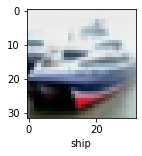

In [21]:
y_test = y_test.reshape(-1, )
plot_sample(X_test, y_test, 1)

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.5142346e-04, 7.2460498e-05, 1.4608131e-03, 9.2703325e-01,
        8.1607002e-05, 7.5213606e-03, 2.5793639e-04, 4.4849006e-05,
        6.3070394e-02, 5.8751834e-06],
       [2.0370739e-02, 2.1078598e-01, 3.0621362e-07, 2.3838106e-06,
        2.0225303e-07, 2.6193234e-09, 1.4541110e-08, 8.6847149e-07,
        7.6798201e-01, 8.5751287e-04],
       [3.4509249e-02, 3.0167747e-01, 3.3678094e-04, 3.6690228e-03,
        1.7807175e-03, 1.6689691e-04, 3.8939648e-05, 8.8369998e-04,
        6.4192003e-01, 1.5017235e-02],
       [9.0343410e-01, 2.3538432e-04, 2.0560676e-02, 1.6618787e-03,
        6.0862782e-03, 7.3399438e-05, 8.3997520e-06, 4.4511369e-04,
        6.7481212e-02, 1.3475557e-05],
       [3.0165854e-08, 2.0052763e-05, 1.5266251e-02, 7.8144735e-03,
        3.7716067e-01, 4.2199885e-04, 5.9931105e-01, 5.0009949e-06,
        4.1955118e-07, 5.7612112e-08]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

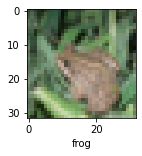

In [30]:
plot_sample(X_test, y_test, 4)

In [31]:
classes[y_classes[4]]

'frog'

In [32]:
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.84      0.79      0.81      1000
           2       0.52      0.67      0.59      1000
           3       0.53      0.51      0.52      1000
           4       0.62      0.63      0.63      1000
           5       0.67      0.50      0.58      1000
           6       0.79      0.75      0.77      1000
           7       0.72      0.75      0.73      1000
           8       0.82      0.78      0.80      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

